In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [7]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [8]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [10]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history=model.fit(X_train_trf, y_train, batch_size=50, epochs=125,verbose=1, validation_split=0.25)

Epoch 1/125
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7985 - loss: 0.4865 - val_accuracy: 0.8015 - val_loss: 0.4532
Epoch 2/125
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8113 - loss: 0.4384 - val_accuracy: 0.8150 - val_loss: 0.4367
Epoch 3/125
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8220 - loss: 0.4170 - val_accuracy: 0.8165 - val_loss: 0.4306
Epoch 4/125
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8161 - loss: 0.4283 - val_accuracy: 0.8155 - val_loss: 0.4279
Epoch 5/125
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8235 - loss: 0.4161 - val_accuracy: 0.8140 - val_loss: 0.4262
Epoch 6/125
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8164 - loss: 0.4282 - val_accuracy: 0.8180 - val_loss: 0.4251
Epoch 7/125
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8250 - loss: 0.4190 - val_accuracy: 0.8165 - val_loss: 0.4238
Epoch 8/125
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8248 - loss: 0.4164 - val_accu

In [39]:
# Redundant cell, content moved to cell S-S-sZxKyJ4E

In [30]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
# Redundant cell, content moved to cell S-S-sZxKyJ4E

In [41]:
from sklearn.metrics import accuracy_score
import numpy as np

y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0).flatten()
accuracy_score(y_test,y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.7965

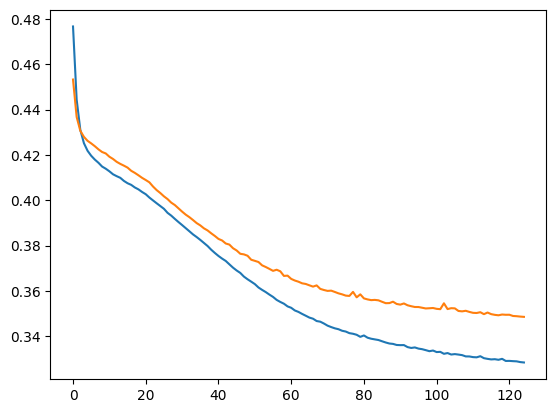

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

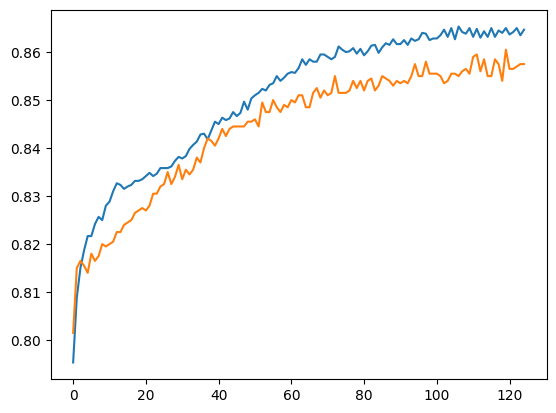

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [46]:
import matplotlib.pyplot as plt

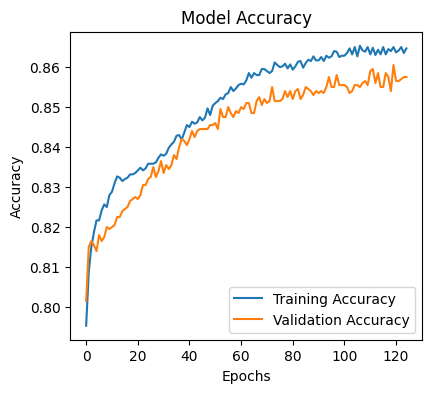

In [47]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

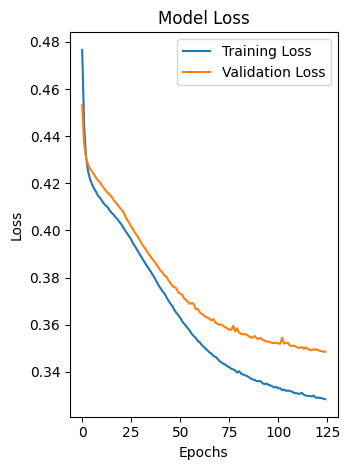

In [48]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7895 - loss: 0.6461
Test Accuracy: 0.7965


In [50]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.33      0.00      0.01       405

    accuracy                           0.80      2000
   macro avg       0.57      0.50      0.45      2000
weighted avg       0.70      0.80      0.71      2000



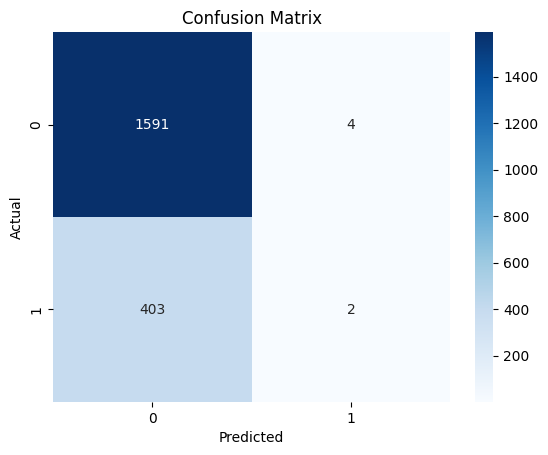

In [52]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [53]:
model.save("churn_model.h5")

In [59]:
!pip install gradio

In [60]:
import gradio as gr
import numpy as np
import tensorflow as tf

In [61]:
def predict_churn(CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary):
    geo_dict = {'France': [1, 0, 0], 'Germany': [0, 1, 0], 'Spain': [0, 0, 1]}
    gender_val = 1 if Gender.lower() == 'male' else 0
    geo_vals = geo_dict.get(Geography, [0, 0, 0])

    input_data = [CreditScore] + geo_vals + [gender_val, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary]
    input_array = np.array(input_data).reshape(1, -1)

    prediction = model.predict(input_array)[0][0]
    return {"Will Churn": float(prediction), "Will Not Churn": 1 - float(prediction)}

In [ ]:
gr.Interface(
    fn=predict_churn,
    inputs=[
        gr.Number(label="Credit Score"),
        gr.Dropdown(["France", "Germany", "Spain"], label="Geography"),
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Number(label="Age"),
        gr.Number(label="Tenure"),
        gr.Number(label="Balance"),
        gr.Number(label="Number of Products"),
        gr.Radio([0, 1], label="Has Credit Card (0/1)"),
        gr.Radio([0, 1], label="Is Active Member (0/1)"),
        gr.Number(label="Estimated Salary")
    ],
    outputs=gr.Label(num_top_classes=2, label="Churn Prediction"),
    title="Customer Churn Predictor",
    description="Enter customer details to predict if they will churn."
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3bdaa5b3e3d7f986e0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
